In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Multiple Variable Linear Regression

## Student Performance Dataset

In [2]:
# Read csv into df and trim
df =pd.read_csv('datasets/Student_Performance.csv')
df = df.iloc[:1000, :].drop(columns = ['Extracurricular Activities'])
cols = list(df.columns)
df_x = df.iloc[:, :-1]
df_y = df.iloc[:, -1]

In [3]:
# Convert df into ndarray
X_train = df_x.to_numpy()
y_train = df_y.to_numpy()
X_features = cols[:-1]
y_target = cols[-1]
m, n = X_train.shape

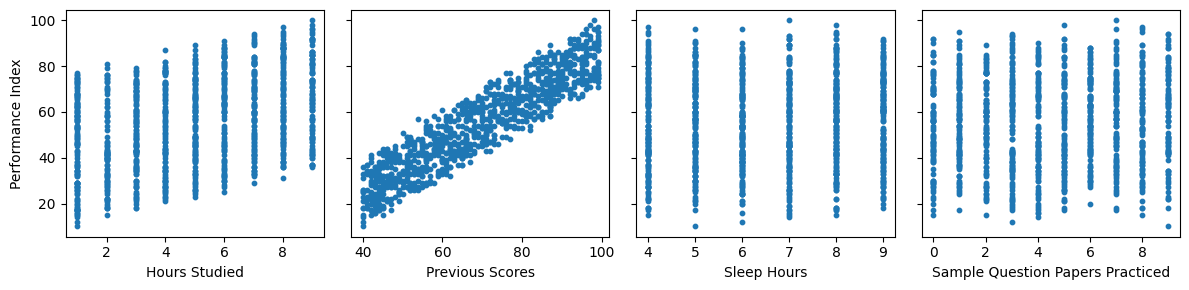

In [4]:
# Visualize training set
fig, ax = plt.subplots(1, n, figsize = (12, 3), sharey = True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, s = 10)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel(y_target)
plt.tight_layout()
plt.savefig('figures/main_01.png')
plt.show()

## Implementing Gradient Descent Algorithm

In [5]:
# Cost Function
def compute_cost(X, y , w, b):
    '''
    :param X: (m, n-1)
    :param y: (m, )
    :param w: (n, )
    :param b: (scalar)
    :return: (scalar) cost at given param and train set
    '''
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        y_hat_i = np.dot(X[i], w) + b
        cost += (y_hat_i - y[i]) ** 2
    cost /= (2*m)
    return cost

In [6]:
# Gradient Function
def compute_gradient(X, y, w, b):
    '''
    :param X: (m, n)
    :param y: (m, 1)
    :param w: (n, )
    :param b: (scalar)
    :return:
        dj_dw: (n, )
        dj_dw: (1, )
    '''
    m, n = X.shape
    dj_dw = np.zeros((n, ))
    dj_db = 0.0
    for i in range(m):
        error = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += error * X[i, j]
        dj_db += error
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [7]:
# Gradient Descent Algorithm
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    cost_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost_history.append(cost_function(X,y,w,b))
    return w, b, cost_history

In [8]:
# Parameter Settings
w_in = np.zeros((n, ))
b_in = 0

iter = 1000
alpha = 3.0e-5

In [9]:
# Run Algorithm
w_final, b_final, cost_history = gradient_descent(X_train, y_train, w_in, b_in, compute_cost, compute_gradient, alpha, iter)
print(f"Final parameters b, w: {b_final:0.2f},{w_final} ")

Final parameters b, w: -0.02,[ 0.43024294  0.78817752 -0.09030903 -0.03781591] 


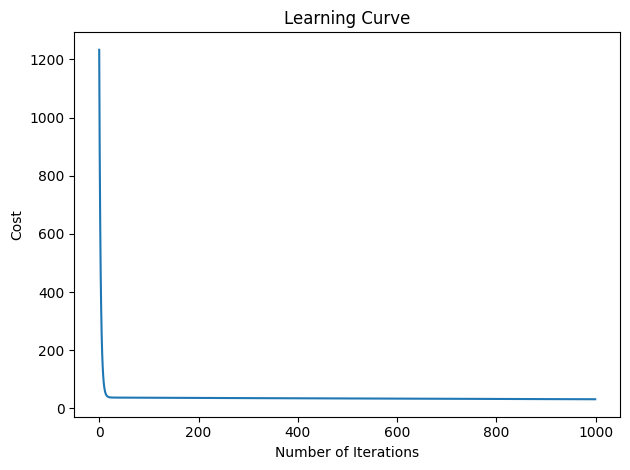

In [10]:
# Plot Learning Curve
plt.plot(cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Learning Curve')
plt.tight_layout()
plt.savefig('figures/main_02.png')
plt.show()

# Model Speed Comparison : Serial Computing vs Parallel Computing

In [11]:
# Serial computing version of cost function
def compute_cost_serial(X, y, w, b):
    m, n = X.shape
    cost = 0.0
    for i in range(m):
        p = 0
        for j in range(n):
            p += X[j]*w[j]
        y_hat_i = p + b
        cost += (y_hat_i - y[i]) ** 2
    cost /= (2 * m)
    return cost

In [12]:
# Serial computing version of gradient function
def compute_gradient_serial(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n, ))
    dj_db = 0.0
    for i in range(m):
        p = 0
        for j in range(n):
            p += X[i, j]*w[j]
        error = (p + b) - y[i]
        for j in range(n):
            dj_dw[j] += error * X[i, j]
        dj_db += error
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [13]:
# Parallel Computing in Learning
start_time = time.time()
w_final, b_final, cost_history = gradient_descent(X_train, y_train, w_in, b_in, compute_cost, compute_gradient, alpha, iter)
end_time = time.time()
elapsed_time_p = end_time - start_time

In [14]:
# Serial Computing in Learning
start_time = time.time()
w_final, b_final, cost_history = gradient_descent(X_train, y_train, w_in, b_in, compute_cost_serial, compute_gradient_serial, alpha, iter)
end_time = time.time()
elapsed_time_s = end_time - start_time

In [15]:
# Time Comparision in Learning
print(f"Total time elapsed for parallel computing: {elapsed_time_p:.6f} seconds")
print(f"Total time elapsed for serial computing: {elapsed_time_s:.6f} seconds")
time_dif = (elapsed_time_s - elapsed_time_p) / iter
print(f"Time Difference per each step: {time_dif:.9f} seconds")

Total time elapsed for parallel computing: 3.164074 seconds
Total time elapsed for serial computing: 8.549484 seconds
Time Difference per each step: 0.005385411 seconds
